In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sigma_cabs.csv')
df.shape

(131662, 14)

In [4]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите матрицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [5]:
df_c = df.copy()

In [6]:
num_df = df_c.describe()
obj_df = df_c.describe(include='object')

In [7]:
df_c.isna().sum()

,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,5920
Life_Style_Index,20193
Confidence_Life_Style_Index,20193
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,71030
Var2,0


In [8]:
# заполняем медианой пропущенные вещественные признаки
for col in num_df.columns:
    df_c[col] = df_c[col].fillna(num_df[col]['50%'])

In [9]:
# заполняем модой пропущенные категориальные признаки
for col in obj_df.columns:
    df_c[col] = df_c[col].fillna(obj_df[col]['top'])

In [10]:
df_c.isna().sum().sum()

np.int64(0)

<Axes: >

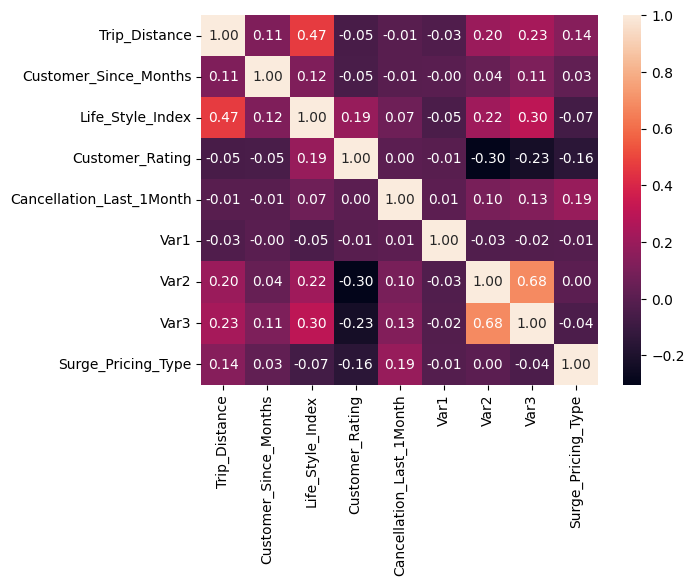

In [11]:
sns.heatmap(data=df_c.loc[:, num_df.columns].corr(), annot=True, fmt='.2f')

In [19]:
df_c.loc[:, num_df.columns].corr().abs()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.114413,0.468332,0.054654,0.007686,0.031388,0.200456,0.231706,0.135928
Customer_Since_Months,0.114413,1.000000,0.119279,0.048969,0.006180,0.000977,0.041814,0.110851,0.027194
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,0.045710,0.215944,0.303324,0.073692
Customer_Rating,0.054654,0.048969,0.189165,1.000000,0.003595,0.005398,0.302968,0.227531,0.155279
Cancellation_Last_1Month,0.007686,0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646
Var1,0.031388,0.000977,0.045710,0.005398,0.011711,1.000000,0.025133,0.020892,0.013754
Var2,0.200456,0.041814,0.215944,0.302968,0.095830,0.025133,1.000000,0.683437,0.003437
Var3,0.231706,0.110851,0.303324,0.227531,0.128686,0.020892,0.683437,1.000000,0.039309
Surge_Pricing_Type,0.135928,0.027194,0.073692,0.155279,0.185646,0.013754,0.003437,0.039309,1.000000


In [20]:
df_c = pd.get_dummies(df_c, columns=obj_df.columns, drop_first=True, dtype=np.int8)

In [24]:
df_c.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male'],
      dtype='object')

### Training

In [25]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X = df_c.drop(columns=['Surge_Pricing_Type'])
y = df_c.Surge_Pricing_Type

In [27]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [62]:
from sklearn.multiclass import OneVsRestClassifier as one_vs_one
from sklearn.linear_model import LogisticRegression

### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_one_lr', one_vs_one(LogisticRegression()))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one_lr',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



In [45]:
print(f"""Precision равно: {precision_score(y_test,
                                            pipe.predict(X_test),
                                            average='macro'):.3f}""" )

print(f"""Recall равно: {recall_score(y_test,
                                      pipe.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(y_test,
                                  pipe.predict(X_test),
                                  average='macro'):.3f}""" )

Precision равно: 0.700
Recall равно: 0.649
F-мера равно: 0.662


Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации!

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [63]:
param_grid = {'one_vs_one_lr__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_one_lr__estimator__C': [0.001, 0.01, 0.1, 1]}

In [64]:
### Your code is here
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5)


In [65]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one_lr',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'one_vs_one_lr__estimator__C': [0.001, 0.01, 0.1, 1],
                         'one_vs_one_lr__estimator__penalty': ['l1', 'l2',
                                                               'elasticnet']})

In [69]:
print(classification_report(y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор?

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

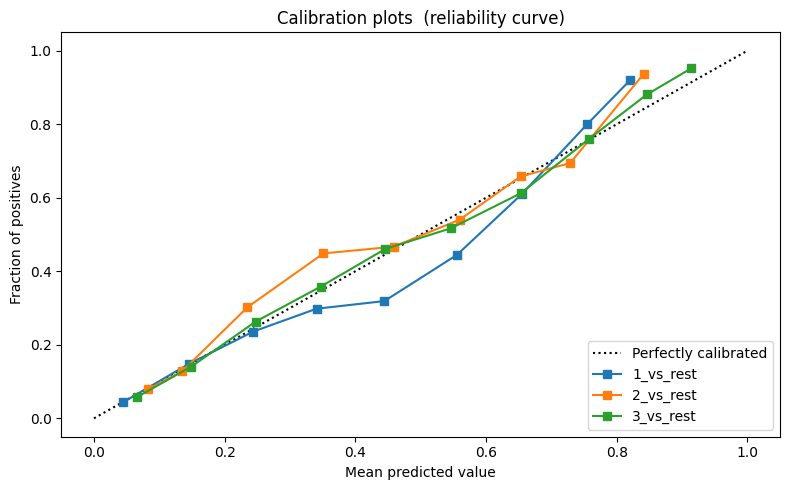

In [78]:
### Your code is here
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

prob_pos = pipe.predict_proba(X_test)[:, 0]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 1 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="1_vs_rest")

prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 2 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="2_vs_rest")

prob_pos = pipe.predict_proba(X_test)[:, 2]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 3 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="3_vs_rest")


plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
# plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых.

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [79]:
grid.best_params_

{'one_vs_one_lr__estimator__C': 0.001,
 'one_vs_one_lr__estimator__penalty': 'l2'}

In [83]:
### Создание полиномиальных признаков

X_polinomial = X.copy()


### Your code is here
X_polinomial[num_df.drop(columns=['Surge_Pricing_Type']).columns]

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_ID,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102
...,...,...,...,...,...,...,...,...
T0005908509,11.72,1.0,2.74229,3.28500,0,61.0,47,76
T0005908510,74.81,7.0,2.81059,0.44500,0,61.0,63,88
T0005908512,40.17,10.0,2.99565,3.33625,0,61.0,48,75


In [84]:
for col in num_df.drop(columns=['Surge_Pricing_Type']):
  for power in range(2, 5):
    col_pow_name = f'{col}**{power}'
    X_polinomial[col_pow_name] = X_polinomial[col] ** power

In [86]:
X_polinomial.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Male', 'Trip_Distance**2',
       'Trip_Distance**3', 'Trip_Distance**4', 'Customer_Since_Months**2',
       'Customer_Since_Months**3', 'Customer_Since_Months**4',
       'Life_Style_Index**2', 'Life_Style_Index**3', 'Life_Style_Index**4',
       'Customer_Rating**2', 'Customer_Rating**3', 'Customer_Rating**4',
       'Cancellation_Last_1Month**2', 'Cancellation_Last_1Mont

In [87]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y,
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=2022)

In [88]:
### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_one_lr', one_vs_one(LogisticRegression()))
])

grid_params = {'one_vs_one_lr__estimator__C': 0.001,
               'one_vs_one_lr__estimator__penalty': 'l2'}

grid = GridSearchCV(pipe, param_grid, cv=5)

In [90]:
grid.fit(X_pol_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one_lr',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'one_vs_one_lr__estimator__C': [0.001, 0.01, 0.1, 1],
                         'one_vs_one_lr__estimator__penalty': ['l1', 'l2',
                                                               'elasticnet']})

In [91]:
print(classification_report(y_test, grid.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

prob_pos = grid.predict_proba(X_pol_test)[:, 0]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 1 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="1_vs_rest")

prob_pos = grid.predict_proba(X_pol_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 2 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="2_vs_rest")

prob_pos = grid.predict_proba(X_pol_test)[:, 2]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test.apply(lambda x: 1 if x == 3 else 0), prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="3_vs_rest")


plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
# plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()


In [ ]:
### Your code is here



**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [95]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

In [96]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier as one_vs_rest

### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_rest', one_vs_rest(SGDClassifier()))
])

In [97]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest', OneVsOneClassifier(estimator=SGDClassifier()))])

In [99]:
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.521     0.614      5372
           2      0.626     0.870     0.728     11349
           3      0.756     0.536     0.627      9612

    accuracy                          0.677     26333
   macro avg      0.710     0.642     0.656     26333
weighted avg      0.698     0.677     0.668     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [102]:
param_grid = {'one_vs_rest__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_rest__estimator__penalty': ['l1', 'l2'],
              'one_vs_rest__estimator__alpha': [0.001, 0.01, 0.1]}

In [103]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [104]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_rest',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_rest__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_rest__estimator__loss': ['hinge', 'log',
                                                          'modified_huber'],
                         'one_vs_rest__estimator__penalty': ['l1', 'l2']})

In [105]:
print(classification_report(y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.756     0.517     0.615      5372
           2      0.625     0.876     0.730     11349
           3      0.762     0.535     0.628      9612

    accuracy                          0.678     26333
   macro avg      0.714     0.643     0.658     26333
weighted avg      0.702     0.678     0.669     26333



In [106]:
grid.best_params_

{'one_vs_rest__estimator__alpha': 0.1,
 'one_vs_rest__estimator__loss': 'hinge',
 'one_vs_rest__estimator__penalty': 'l2'}

In [107]:
grid.best_score_

np.float64(0.6807052341843631)

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report
### С оптимальными параметрами


# Создадим pipeline со стандартизацией данных и классификатором
pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_one", OneVsOneClassifier(SGDClassifier(alpha=0.1, penalty='l2', loss='modified_huber')))])
# Обучим модель
pipe.fit(X_train, y_train)

# Сделаем предсказание на тестовой выборке
y_pred = pipe.predict(X_test)

# Посчитаем и выведем на печать метрики с помощью classification_report
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.746     0.529     0.619      5372
           2      0.631     0.849     0.724     11349
           3      0.748     0.565     0.644      9612

    accuracy                          0.680     26333
   macro avg      0.709     0.648     0.662     26333
weighted avg      0.697     0.680     0.673     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?